In [141]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

In [142]:
def plot_data(X, y, ds_num):
    plt.scatter(X[:, 0], X[:, 1], c=y) 
    plt.title(f"Dataset {ds_num}")
    plt.savefig(f'image/dataset_{ds_num}.jpg')
    plt.show() 


Looks separable using a linear function

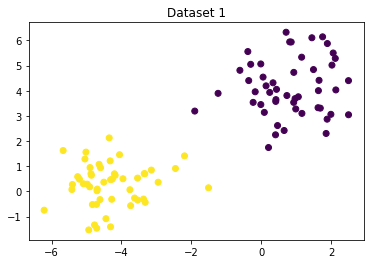

In [143]:
from sklearn.datasets import make_blobs
  
X_lin, y_lin = make_blobs(n_samples=100, centers=2, random_state=3) 
plot_data(X_lin, y_lin, 1)

Looks separable using a polynomial function of degree 3

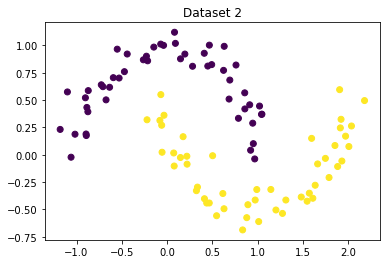

In [144]:
from sklearn.datasets import make_moons
  
X_poly, y_poly = make_moons(n_samples=100, noise=0.1) 
plot_data(X_poly, y_poly, 2)

Looks separable using a gaussian function of in 3 dimension

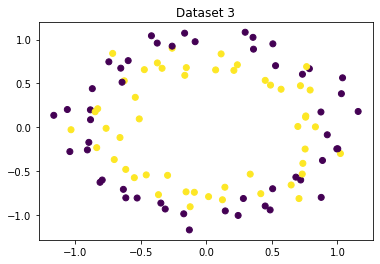

In [145]:
from sklearn.datasets import make_circles 
  
X_gaus, y_gaus = make_circles(n_samples=100, shuffle=True,  
                    noise=0.1, random_state=42) 
plot_data(X_gaus, y_gaus, 3)

Looks separable using a tanh function

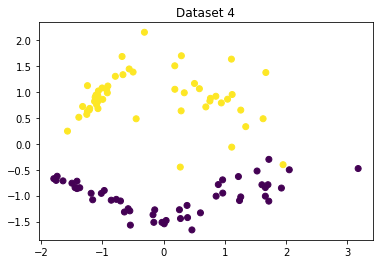

In [146]:
from sklearn.datasets import make_classification
  
X_tanh, y_tanh = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, shuffle=False, random_state=1) # random_state is used to not change the plot after every generation
plot_data(X_tanh, y_tanh, 4)


Define the kernel functions (arbitrary hyperparameters are used since it is not our purpose to compare performances between using different hyperparameters)

In [147]:
def linear_kernel(x_i, x_j):
    return np.inner(x_i, x_j)

def poly_kernel(x_i, x_j,c=1,d=3):
    return (np.inner(x_i, x_j)+c)**d

def rbf_kernel(x_i, x_j, sigma=0.01): 
    return np.exp(np.linalg.norm(x_i-x_j)/2*sigma)

def sigmoid_kernel(x_i, x_j, alpha=1, beta=0):
    return np.tanh(alpha*np.inner(x_i, x_j)+beta)

In [148]:
def sum_inner_product_diff_label(kernel, dataset_X, dataset_y):

    index_label_zero = []
    index_label_one = []

    # find the index of the dataset which has label 0 and label 1
    for i in range(0,100):
        if dataset_y[i] == 0:
            index_label_zero.append(i)
        else:
            index_label_one.append(i)

    # print(index_label_zero)
    inner_product_list =[]

    # calculate the inner product between data points with different label 
    # with the purpose of checking whether they yield a big number, indictating a good separation, a small number, indicating a bad separation
    for i in index_label_zero: 
        for j in index_label_one:
            inner_product = kernel(dataset_X[i], dataset_X[j])
            inner_product_list.append(inner_product)
            
    # we will sum the value of each inner product between two differently labeled data points 
    return sum(inner_product_list)


-135.42138643157335

In [163]:
# Creating a 4x4 DataFrame
data_diff_label = {
    'linear kernel': [sum_inner_product_diff_label(linear_kernel, X_lin, y_lin), sum_inner_product_diff_label(linear_kernel, X_poly, y_poly), sum_inner_product_diff_label(linear_kernel, X_gaus, y_gaus), sum_inner_product_diff_label(linear_kernel, X_tanh, y_tanh)],
    'polynomial kernel': [sum_inner_product_diff_label(poly_kernel, X_lin, y_lin), sum_inner_product_diff_label(poly_kernel, X_poly, y_poly), sum_inner_product_diff_label(poly_kernel, X_gaus, y_gaus), sum_inner_product_diff_label(poly_kernel, X_tanh, y_tanh)],
    'RBF kernel': [sum_inner_product_diff_label(rbf_kernel, X_lin, y_lin), sum_inner_product_diff_label(rbf_kernel, X_poly, y_poly), sum_inner_product_diff_label(rbf_kernel, X_gaus, y_gaus), sum_inner_product_diff_label(rbf_kernel, X_tanh, y_tanh)],
    'sigmoid kernel': [sum_inner_product_diff_label(sigmoid_kernel, X_lin, y_lin), sum_inner_product_diff_label(sigmoid_kernel, X_poly, y_poly), sum_inner_product_diff_label(sigmoid_kernel, X_gaus, y_gaus), sum_inner_product_diff_label(sigmoid_kernel, X_tanh, y_tanh)]
}
 
index_labels = ['dataset 1', 'dataset 2', 'dataset 3', 'dataset 4']
 
df_diff_label = pd.DataFrame(data_diff_label, index=index_labels)

print("Dataframe for sum of inner product between different labeled data points:")
print(df_diff_label)

Dataframe for sum of inner product between different labeled data points:
           linear kernel  polynomial kernel   RBF kernel  sigmoid kernel
dataset 1   -6096.659450     -383633.474566  2583.274954     -830.145298
dataset 2    -174.911796        8198.344339  2519.207048     -135.421386
dataset 3      -0.089337        4991.186915  2514.776569       -0.129558
dataset 4   -2278.208266        5238.960408  2531.145857    -1084.575836


Plotting the dataframe

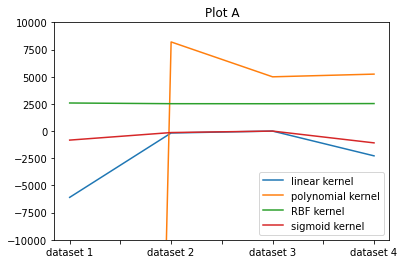

In [186]:
plot_a = df_diff_label.plot(title="Plot A") # inner products between points of different labels/classes (bigger the better)
plot_a.set_ylim(-10000,10000) # disregarding the outlier which was too low

# save figure
plot_a=plot_a.figure
plot_a.savefig(f'image/plot_a.jpg')

Now, the inner product between data points of the same classes

In [167]:
def sum_inner_product_same_label(kernel, dataset_X, dataset_y):

    index_label_zero = []
    index_label_one = []

    # find the index of the dataset which has label 0 and label 1
    for i in range(0,100):
        if dataset_y[i] == 0:
            index_label_zero.append(i)
        else:
            index_label_one.append(i)

    # print(index_label_zero)
    inner_product_list =[]

    # calculate the inner product between data points with different label 
    # with the purpose of checking whether they yield a big number, indictating a good separation, a small number, indicating a bad separation
    for i in index_label_zero: 
        for j in index_label_zero:
            inner_product = kernel(dataset_X[i], dataset_X[j])
            inner_product_list.append(inner_product)
            
    for i in index_label_one: 
        for j in index_label_one:
            inner_product = kernel(dataset_X[i], dataset_X[j])
            inner_product_list.append(inner_product)

    # we will sum the value of each inner product between two differently labeled data points 
    return sum(inner_product_list)

In [170]:
# Creating a 4x4 DataFrame
data_same_label = {
    'linear kernel': [sum_inner_product_same_label(linear_kernel, X_lin, y_lin), sum_inner_product_same_label(linear_kernel, X_poly, y_poly), sum_inner_product_same_label(linear_kernel, X_gaus, y_gaus), sum_inner_product_same_label(linear_kernel, X_tanh, y_tanh)],
    'polynomial kernel': [sum_inner_product_same_label(poly_kernel, X_lin, y_lin), sum_inner_product_same_label(poly_kernel, X_poly, y_poly), sum_inner_product_same_label(poly_kernel, X_gaus, y_gaus), sum_inner_product_same_label(poly_kernel, X_tanh, y_tanh)],
    'RBF kernel': [sum_inner_product_same_label(rbf_kernel, X_lin, y_lin), sum_inner_product_same_label(rbf_kernel, X_poly, y_poly), sum_inner_product_same_label(rbf_kernel, X_gaus, y_gaus), sum_inner_product_same_label(rbf_kernel, X_tanh, y_tanh)],
    'sigmoid kernel': [sum_inner_product_same_label(sigmoid_kernel, X_lin, y_lin), sum_inner_product_same_label(sigmoid_kernel, X_poly, y_poly), sum_inner_product_same_label(sigmoid_kernel, X_gaus, y_gaus), sum_inner_product_same_label(sigmoid_kernel, X_tanh, y_tanh)]
}
 
index_labels = ['dataset 1', 'dataset 2', 'dataset 3', 'dataset 4']
 
df_same_label = pd.DataFrame(data_same_label, index=index_labels)

print("Dataframe for sum of inner product between same labeled data points:")
print(df_same_label)

Dataframe for sum of inner product between same labeled data points:
           linear kernel  polynomial kernel   RBF kernel  sigmoid kernel
dataset 1   90654.065145       4.670066e+07  5042.208176     4999.962025
dataset 2    3430.540611       5.410375e+04  5024.126402     1946.266822
dataset 3       0.565557       1.046834e+04  5029.039545        0.462821
dataset 4    4623.284562       8.907792e+04  5035.633501     2231.873908


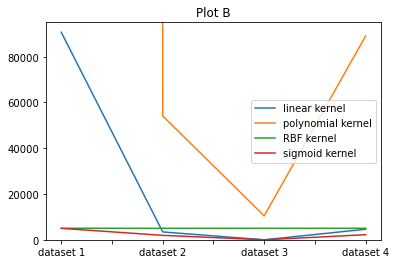

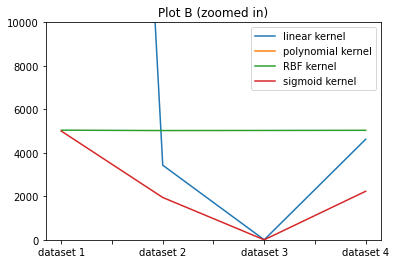

In [189]:
plot_b = df_same_label.plot(title="Plot B") # inner products between points of different labels/classes (smaller the better)
plot_b.set_ylim(0,95000) # disregarding the outlier which was too high

# save figure
plot_b_1=plot_b.figure
plot_b_1.savefig(f'image/plot_b_1.jpg')

plot_b = df_same_label.plot(title="Plot B (zoomed in)")
plot_b.set_ylim(0,10000) # disregarding the outlier which was too high
plot_b_2=plot_b.figure
plot_b_2.savefig(f'image/plot_b_2.jpg')